# Real estate Price prediction using Multiple linear regression
- Authors: Group 19
* Alex Muturi | Angela Nyaga | Annette Kalekye | Chris Otieno              



### Business Problem

Mipaka, is a fictional company in the real estate field. Key to its main activities is construction and  mortgage valuation. The current mortgage valuation process invovles in-person visits by human agents and little automation.  With an increase in the data it uses in mortgage valuation and an increasing complexity in the market, it's looking to improve its process of valuing properties and developing new houses to ensure its business processes maximize profit.

This project uses different regression models that will help Mipaka predict house values more accurately, and identify factors that have the most influence on a property's price. The goal is to help Mipaka improve accuracy, minimize risk associated with under/over valuing properties and simplify its valuation process.

**Overview**

give overview of project steps from beginning to recommedations

**Business Problem**

 explain the project’s value for helping a specific stakeholder solve a real-world problem.

**Data understanding**

clearly describe the source and properties of the data to show how useful the data are for solving the problem of interest.

**Loading Libraries**

In [2]:
#loading needed libraries
import pandas as pd
import numpy as np
from math import radians
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import dataset**

In [3]:
#loading our data set for analysis and cleaning
df = pd.read_csv('kc_house_data.csv', index_col=0)
#previewing our dataset
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000


**Data exploration and understanding**

In [4]:
#To get an overview/summary of our dataset, thid includes nn- null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

Interpreting the total columns and columns with missing values in the dataframe
+ The DataFrame 'kc_house_data.csv' has a total of 21597 rows and 20 columns.
+ 'waterfront' - This column has 19221 non-null entries; there are some missing values for this variable. The data type is 'object,'; it is explaining a waterfront feature of the houses.
+ 'view' - This column has 21534 non-null entries; there are some missing values for this variable. The data type is 'object,'; it is explaining houses with a view.
+ 'yr_renovated' - This column has 21534 non-null entries; there are some missing values for this variable. The data type is 'float,'; it represents the year a house was renovated.


In [5]:
#finding the statistical summary of our dataset
df.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,21597,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,5,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,Average,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,14020,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,NaN,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,NaN,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,NaN,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,NaN,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,NaN,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,NaN,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


**Data cleaning**

We will identify and correct any data inconsistencies within our dataset, deal with missing values and invalid entries

In [6]:
df.isna()# Checks missing values

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6414100192,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5631500400,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2487200875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1954400510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6600060120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1523300141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum() #to see missing value

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

view and waterfront are both categorical data types we replace their missing values using mode.The % of data missing is below 15% we do not expect that this repalcement will affect our model outcome.


In [8]:
mode_view = df['view'].mode()[0]
df['view'].fillna(mode_view, inplace=True)

In [9]:
mode_waterfront = df['waterfront'].mode()[0]
df['waterfront'].fillna(mode_waterfront, inplace=True)

In [10]:
#replacing the yr_renovated with the median, we need this column in our analysis
median_yr_renovated = df['yr_renovated'].median()

In [11]:
df['yr_renovated'].fillna(df['yr_renovated'].median(),inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

The output above confirms there is no more missing data in each column, all missing values have been handled and our data is noe ready for further analysis.

# Exploratory Data Analysis

+ We visualize the data to gain insights, identify patterns and understand relationshipd between the data variables.This will also prepare our data for further modeling.


**Data visualization**

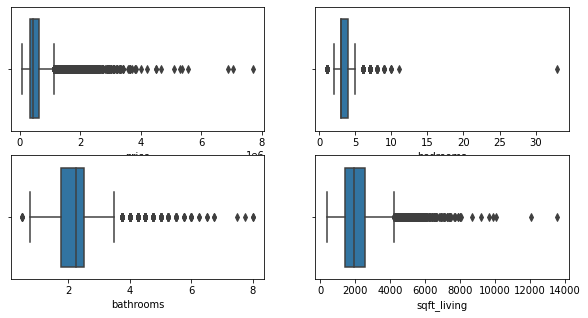

In [13]:
#finding outliers in our dataset with numerical columns
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data = df,x='price', ax = axs[0,0])
plt2 = sns.boxplot(data = df,x='bedrooms', ax = axs[0,1])
plt3 = sns.boxplot(data = df,x='bathrooms', ax = axs[1,0])
plt4 = sns.boxplot(data = df,x='sqft_living', ax = axs[1,1])

plt.show()

price and sqft_living have considerable outliers

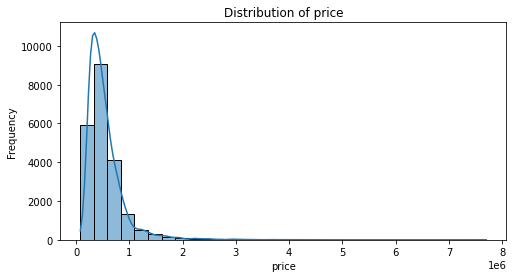

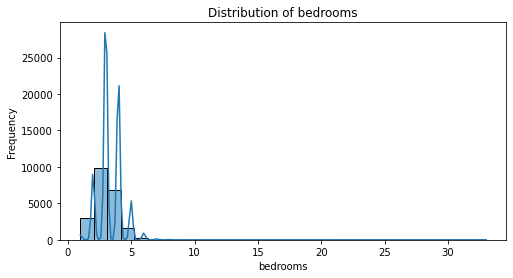

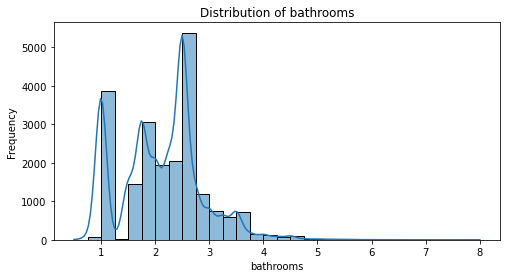

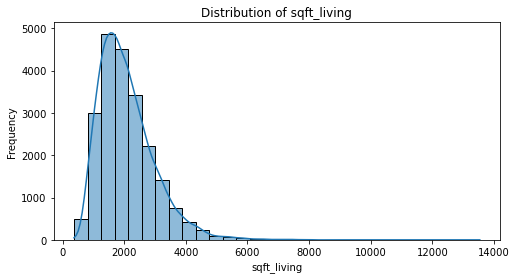

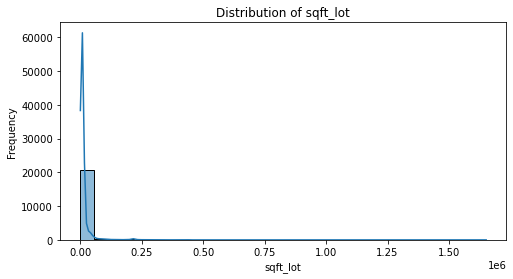

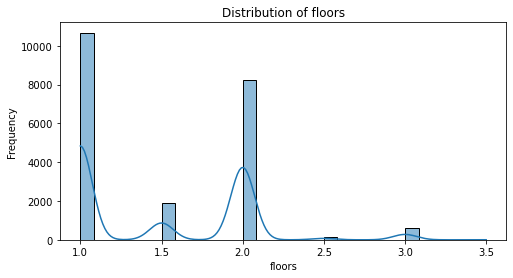

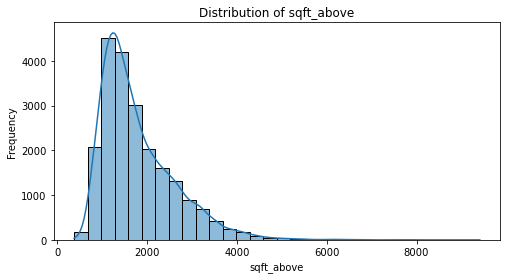

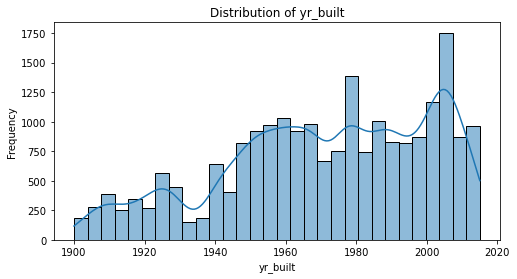

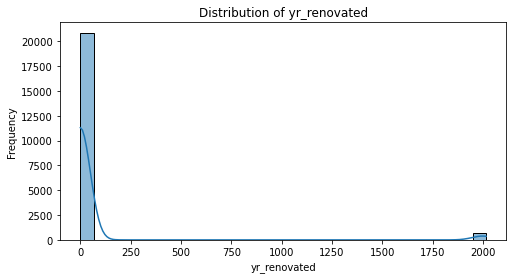

In [14]:
# univariate analysis
numerical_columns= ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'sqft_above', 'yr_built', 'yr_renovated']
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

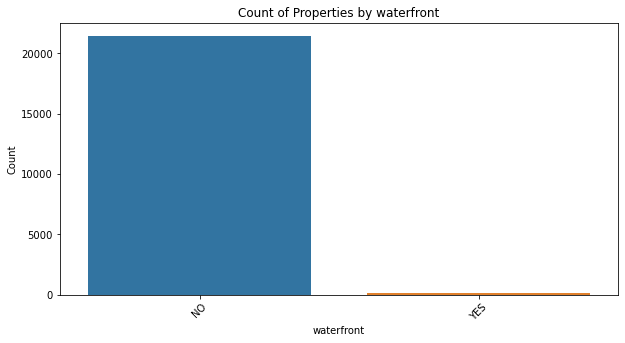

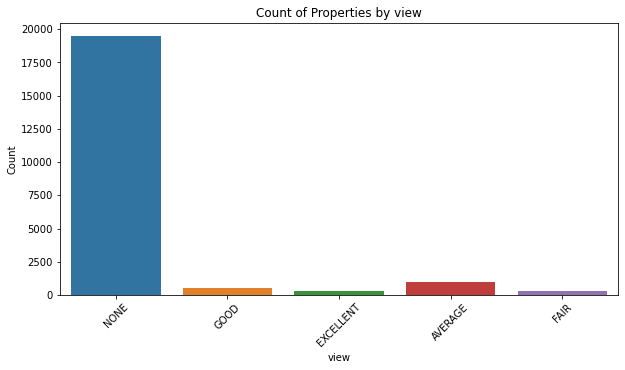

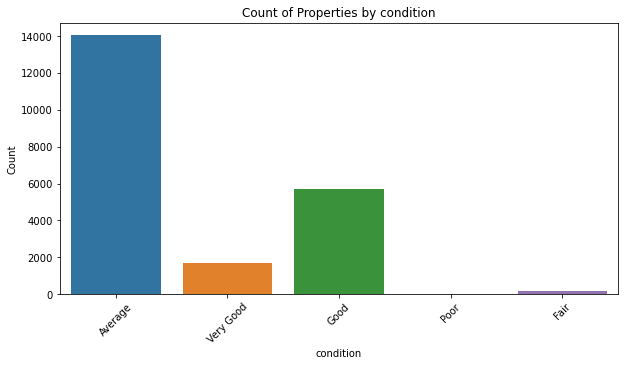

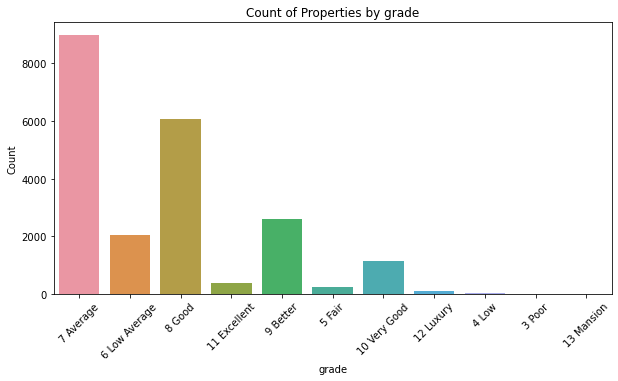

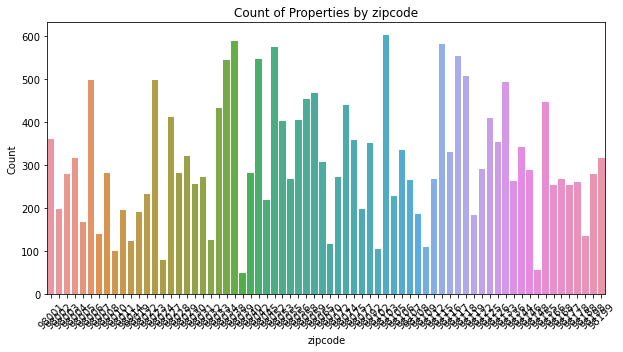

In [15]:
# Bar plot for categorical columns
categorical_columns = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of Properties by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

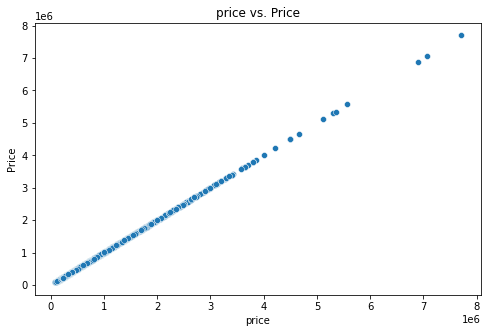

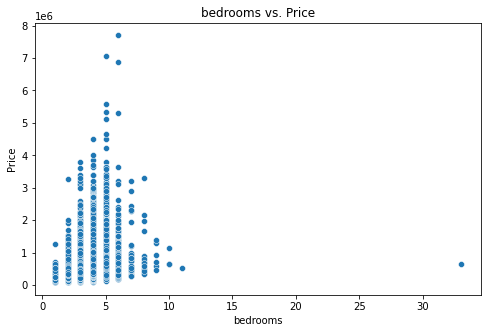

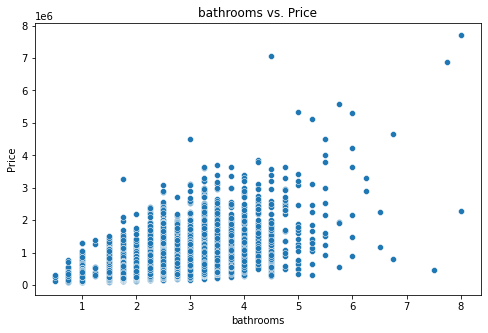

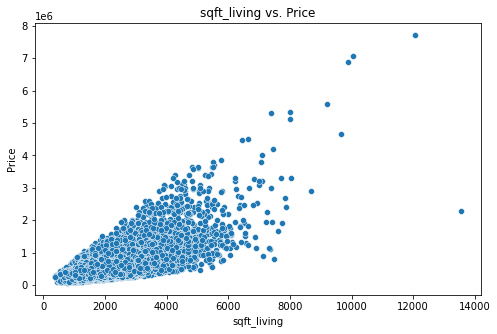

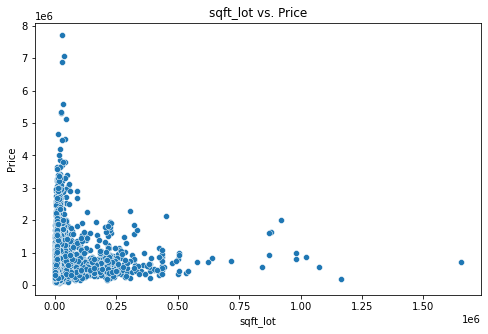

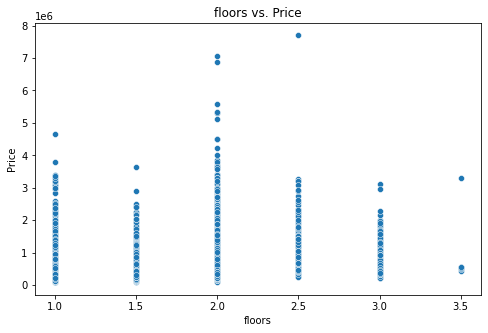

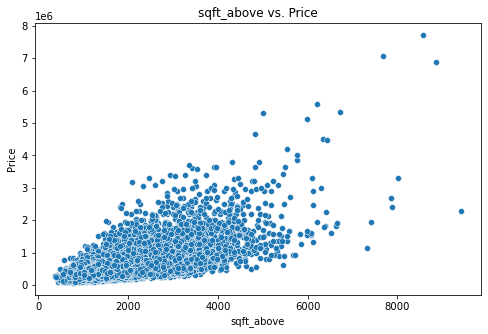

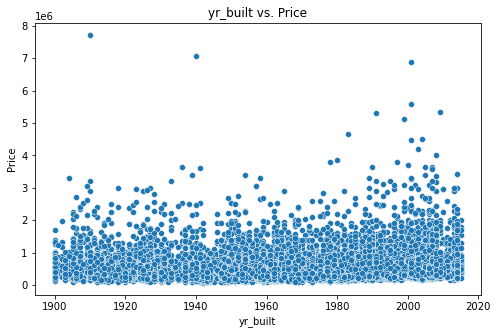

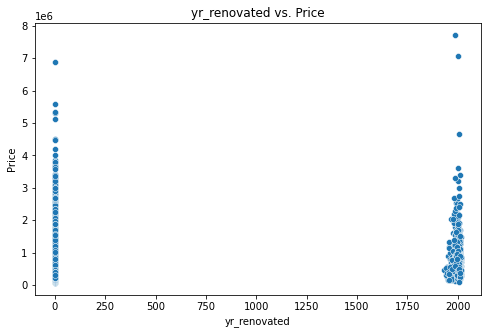

In [16]:
# Bivariate analysis
# Scatter plots for relationships between numerical columns and price

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

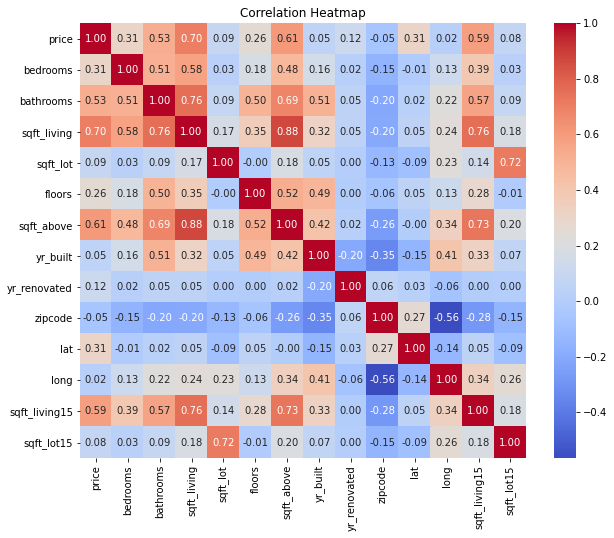

In [17]:
# Correlation matrix heatmap to check what variables are highly corrrelated
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Modelling 

In this section, we will use regression analysis to describe the relationship between variables and predict a variable ()

In [18]:
#Import necessary libraries 
import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [19]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Baseline model 

The column `sqft_living` column was chosen as it showed the highest correlation from the scatter plots. 

In [20]:
y = df['price']
formula_1 = 'y ~ sqft_living'
model_1 = ols(formula_1, df).fit()
model_1_summ = model_1.summary()
print(model_1_summ)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:31:06   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      

#### Baseline Regression Model Results Interpretation:

The variable square foot living explains 49% of the variance in price. This means while the contribution is noticeable, it's not enough to be used entirely to predict changes in price. Or predict a price of a house. 

We then try a new model including a few more independent variables as below

### Model II

This model considered the age of the building, square foot of the living room and number of bathrooms.

In [21]:
#calculate age and create 'age' column for each entry 
today = datetime.datetime.now()
df['age']= today.year - df['yr_built']

In [22]:
# Create, fit the model and print the results 
formula_2 = 'y ~ sqft_living + bathrooms + age'
model_2 = ols(formula_2, df).fit()
model_2_summ = model_2.summary()
print(model_2_summ)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     8135.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:31:06   Log-Likelihood:            -2.9922e+05
No. Observations:               21597   AIC:                         5.985e+05
Df Residuals:                   21593   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.018e+05   8049.143    -37.494      

In [23]:
# Finding the root mean square error (RMSE)
rmse = ((model_2.resid ** 2).sum() / len(y)) ** 0.5
rmse

251695.88074326064

#### Model II Results Interpretation:

- This model explained 53.1% of the variance in price which makes it a better predictor than our baseline model. However, its coefficient of determination is still less than 0.7 is is a common benchmark value for business decisions.
- The model is statistically significant, with a p-value below 0.05.
- The RMSE is $251,695.880, which means the model is off by that amount for an given prediction. 

Coefficients: 
- sqft_living : $270.2765 : the cost of a house increases by  $270.2765 for 1 square foot in living space 
- bathrooms: : the cost of a house increases by  $62,420  for each extra bathroom
- age $2841.5200 : The price of a house increases by $2841.5200 for every extra year.
Based on this info,  


### Model III
This model added a categorical variable (grade) to try and improve the accuracy of our model. We used one hot (dummy) encoding using pandas' `pd.get_dummies`.


In [24]:
#Inspect the column to understand the various categorical variables
df['grade'].value_counts() 

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [25]:
#Setting up variables to use for the model
X = df[['sqft_living',  'age', 'bathrooms', 'grade']]

#One-hot enconding 'grade' column using pd.get_dummies. Use drop_first = True to avoid the dummy variable trap
X = pd.get_dummies(X, columns=['grade'], drop_first=True)

In [26]:
#preview the exogenous variables
X.head()

,sqft_living,age,bathrooms,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,
7129300520,1180,68,1.00,0,0,0,0,0,0,0,1,0,0
6414100192,2570,72,2.25,0,0,0,0,0,0,0,1,0,0
5631500400,770,90,1.00,0,0,0,0,0,0,1,0,0,0
2487200875,1960,58,3.00,0,0,0,0,0,0,0,1,0,0
1954400510,1680,36,2.00,0,0,0,0,0,0,0,0,1,0


In [27]:
#create the model, fit and print results
model_3 = sm.OLS(y, sm.add_constant(X))
results3 = model_3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2938.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:31:06   Log-Likelihood:            -2.9639e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21583   BIC:                         5.929e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.318e+05   1

In [28]:
# Finding the root mean square error (RMSE)
rmse = ((results3.resid ** 2).sum() / len(y)) ** 0.5
rmse

220735.1073564647

#### Model III Results Interpretation 

- This model explains 63.9% of the variance in our dependent variable, which is an improvement over Model II which explained 53% of the same. 
- grade_10 column was dropped and is used as the reference category 
- All the coefficients are statistically significant, with a p value below 0.05
- RMSE value is 220,735.107. For a predcition, the model is likely to be that much off the correct value. 

Coefficients: 
- sqft_living : 125.83 : the cost of a house increases by about $125.2765 for every 1 square foot increase in living space 
- age:3664 : the price increases by  about $3664  for each extra year.
- bathroom $58,250 : The price of a house increases by $58,250 for each additional bathroom.

### Model IV

We use another categorical variable and add it on to what we had in model III above and evaluate if it will be better.

In [29]:
#check the distribution of the categories
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [30]:
#Setting up variables to use for the model
X = df[['sqft_living', 'age', 'bathrooms', 'grade', 'condition']]
#One-hot enconding 'grade' column using pd.get_dummies. Use drop_first = True to avoid the dummy variable trap
X = pd.get_dummies(X, columns=['grade','condition'], drop_first=True)


In [31]:
# Create model, fit and summarize results
model4 = sm.OLS(y, sm.add_constant(X))
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2260.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:31:06   Log-Likelihood:            -2.9635e+05
No. Observations:               21597   AIC:                         5.927e+05
Df Residuals:                   21579   BIC:                         5.929e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.431e+05   1

In [32]:
# Finding the root mean square error (RMSE)
rmse4 = ((results4.resid ** 2).sum() / len(y)) ** 0.5
rmse4

220298.523051429

#### Model IV Results Interpretation 

- From the R squared, the fourth model explains 64.0% of the variance in the price
- The p-value is below 0.05 so the model is statistically significant. 
- RMSE is 220,298.52 which is slightly lower than what we got from model III


Coefficients: 
- sqft_living :  $124.9077 : the cost of a house increases by  this amount for 1 square foot increase in living space 
- bathrooms: 56,230: the cost of a house increases by $56,230  for each extra bathroom

### Model V Analyzing Relationship Between Sale Price and Location

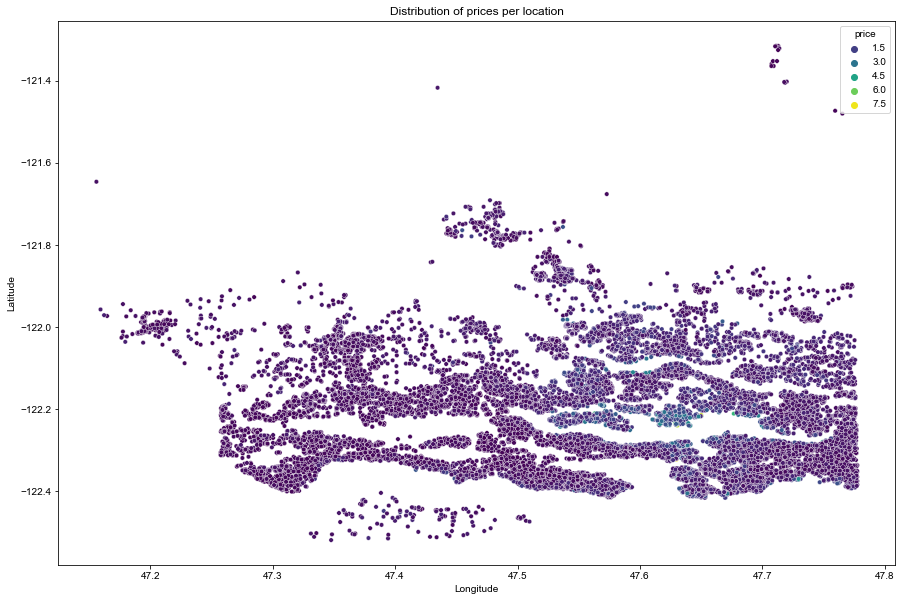

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
# plotting latitude vs longitude (locations)
# hue shows us the price difference in different areas
scatterplot = sns.scatterplot(data=df, x='lat', y='long', hue='price', s=20,palette='viridis')
sns.set_style(style='darkgrid')
sns.set_context = ('poster')
ax.set(title='Distribution of prices per location', ylabel='Latitude', xlabel='Longitude');



From the above map, we can see that there is a relationship between price and location. The locations in the center of the county look to have a different price as compared to the locations on the outside. We will build a KRegressor model to try and predict house sale prices based on location.

We have chosen to use KNeighborsRegressor due to the continuous nature of location(latitude and longitude) and the ease of grouping geo-location data. 

In [34]:
# convert lat and long to radians in order to calculate correct distance between 2 points
df['lat'] = df['lat'].apply(radians)
df['long'] = df['long'].apply(radians)

# set X and Y values
X = df[['lat', 'long']].values
y = df['price'].values

# split data into a test and train set
lat_long_train, lat_long_test, price_train, price_test = train_test_split(X, y, test_size=0.25)

# train using kregressor
regressor = KNeighborsRegressor(n_neighbors = 25,weights='distance', metric='haversine')

regressor.fit(lat_long_train, price_train)



KNeighborsRegressor(metric='haversine', n_neighbors=25, weights='distance')

In [35]:
# make predictions
price_pred = regressor.predict(lat_long_test)

# compare predictions vs actual
comparison_frame = pd.DataFrame({'Actual': price_test.flatten(), 'Predicted': price_pred.flatten()})
comparison_frame

,Actual,Predicted
0,546000.0,510099.453862
1,480000.0,318230.765950
2,215000.0,232967.929263
3,171800.0,230828.970231
4,165000.0,233730.946570
...,...,...
5395,285000.0,365887.361325
5396,763101.0,709107.426899
5397,473600.0,515749.513304
5398,219000.0,426609.468997


#### Model V Interpretation 

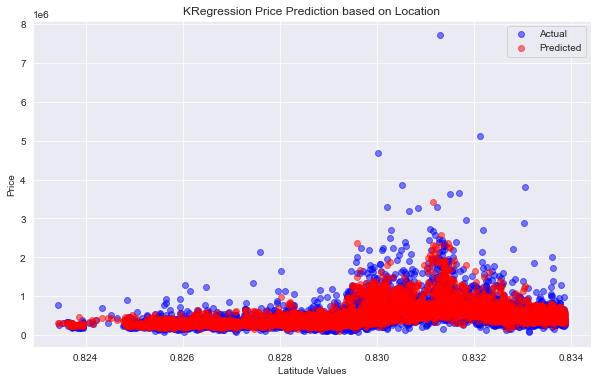

In [36]:
plt.figure(figsize=(10, 6))
# index lat_long_test because its a 2d array
plt.scatter(lat_long_test[:,0], price_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(lat_long_test[:,0], price_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Latitude Values')
plt.ylabel('Price')
plt.title('KRegression Price Prediction based on Location')
plt.legend()
plt.grid(True)
plt.show();


Though there are some outliers, there is significant overlay between the actual points and the predicted points



In [37]:
 #calculate rmse
RMSE = np.sqrt(mean_squared_error(price_test,price_pred))
print(f"The RMSE for the first kregression model with k=25 has an RMSE of {RMSE}")

The RMSE for the first kregression model with k=25 has an RMSE of 245412.12396420678


In [38]:
# second model with a larger k value
# split data into a test and train set
lat_long_train, lat_long_test, price_train, price_test = train_test_split(X, y, test_size=0.25)

# train using kregressor
regressor = KNeighborsRegressor(n_neighbors = 1000,weights='distance', metric='haversine')

regressor.fit(lat_long_train, price_train)

# make predictions
price_pred_2 = regressor.predict(lat_long_test)



In [39]:
RMSE_2 = np.sqrt(mean_squared_error(price_test,price_pred_2))
print(f"The RMSE for the first kregression model with k=1000 has an RMSE of {RMSE_2}")

The RMSE for the first kregression model with k=1000 has an RMSE of 254195.0352946489


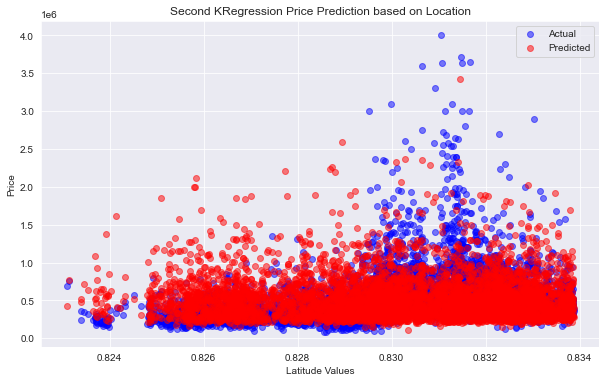

In [40]:
plt.figure(figsize=(10, 6))
# index lat_long_test because its a 2d array
plt.scatter(lat_long_test[:,0], price_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(lat_long_test[:,0], price_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Latitude Values')
plt.ylabel('Price')
plt.title('Second KRegression Price Prediction based on Location')
plt.legend()
plt.grid(True)
plt.show();

The RMSE for the first model is 236992.59, while the RMSE for the second model is 259889.70.
This means that, for the first model, our prediction of price is off by $ 236992.59. 

The RMSE is increasing with an increase in kvalue. This means tht the first model is performing better than the second one. 

Therefore for this problem, the optimal k value is a low k value. The lower the k, the better the prediction. 

# Recommendations




 - **To improve accuracy, Mipaka should use a combination of the following factors : sqft_living, age, bathrooms, grade, condition to improve their price prediction.** Based on our regression analysis, the model created based on these factors accounted for the most variance in change in prices. 

- **For maximum returns, Mipaka should look to develop new housing developments on the Western Side of King County**. Based on our models, the prices towards the East show a slight decrease in price, therefore being less likely to bring in profits. However, the company should note that price prediction based on location is very sensitive to local variations, prices are only similar within a small distance of each other.


- **When building new houses, the factors that maximise price do so in the following ratios : optimum price =  124.90 *sqft_living  + 3485 * age + 5.623e+04n * bathrooms** Therefore, the company should combine its facilities in this approximate ratio to maximise its profits

# Next Steps

 - **More EDA on factors that might affect house prices** Our best perfroming model accounted for less than 70% of the variance in sales. Further exploration should be done on factors not in the dataset that might affect house prices.
 
 
 - **Additional direct market research from real estate stakeholders.** This direct feedback will enhance the models by providing key dimensions missing in the dataset that might help explain variance in house sales.  